<a href="https://colab.research.google.com/github/srichandana498/ML/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Identify the Research Gap for Improvement**

-- Limited datasets; results may not generalize well to other populations.

-- Clinical, genetic, and lifestyle factors not incorporated.

-- No testing in real-world or hospital settings.

-- Ensemble models remain hard to interpret despite SHAP usage.

-- Potential class imbalance not explicitly handled.

-- Only stacking and voting methods used; other ensemble approaches not explored.

-- Temporal or longitudinal data not considered for prediction over time.

-- Feature selection and dimensionality reduction for better efficiency not discussed.





Section 1 : Research Gap :

Cardiovascular risk prediction using ML is promising but prior studies often suffer from:
- Limited datasets that may not generalize to diverse populations
- Lack of integration of clinical, genetic, and lifestyle variables
We implement an ensemble-based framework (Random Forest, Gradient Boosting) with
careful preprocessing, hyperparameter tuning, and evaluation to establish a strong,
reproducible baseline on a unified heart disease dataset.

In [4]:
# ================================================================
# Heart Disease Prediction with Ensemble Learning
# ================================================================

# Section 0: Imports and Manual Upload
import io, sys, warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

print(f"\n[INFO] Reading uploaded file: {filename}")
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("\n[HEAD] First 5 rows:\n", df.head())

# -----------------------------
# Data Understanding & Preprocessing
# -----------------------------
print("\n" + "="*70)
print("3. METHODOLOGY")
print("="*70)
print("\n3.1 Dataset Description")
print("- Columns present:", list(df.columns))

# Normalize common UCI variants:
# Some UCI heart datasets use 'num' as target (0..4). Convert to binary: 0 => 0 (no disease), 1+ => 1 (disease)
# Some use 'target' already in {0,1}.
print("\n[INFO] Basic missingness:\n", df.isnull().sum())

# Strip whitespace and replace '?' in common columns
for col in ['ca', 'thal']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace('?', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute numeric with median, non-numeric with mode
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

non_numeric_cols = df.select_dtypes(exclude=np.number).columns
# Drop 'dataset' if present later; avoid imputing it as feature.
safe_non_numeric = [c for c in non_numeric_cols if c != 'dataset']
for col in safe_non_numeric:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode().iloc[0])

# Drop non-informative columns if present
for drop_col in ['dataset', 'id']:
    if drop_col in df.columns:
        df = df.drop(columns=[drop_col])

# Identify target column robustly
target_col = None
if 'num' in df.columns:
    target_col = 'num'
    # Convert to binary if necessary
    if df['num'].nunique() > 2:
        df['num'] = (df['num'] > 0).astype(int)
elif 'target' in df.columns:
    target_col = 'target'
else:
    raise ValueError("Could not find a target column. Expected 'num' or 'target'.")

# Set features/target
y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

print("\n3.2 Data Preprocessing Strategy")
print("- Will one-hot encode typical categorical columns if present.")
print("- Will standardize continuous features for fair model training.")

# Typical categorical columns in UCI heart dataset (filter by presence)
candidate_cats = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
categorical_cols = [c for c in candidate_cats if c in X.columns]

# One-hot encode present categorical columns (drop_first to avoid dummy trap)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"[INFO] Feature matrix shape after encoding/scaling: {X_scaled.shape}")

Saving heart_disease_uci (2).csv to heart_disease_uci (2) (1).csv

[INFO] Reading uploaded file: heart_disease_uci (2) (1).csv

[HEAD] First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

3. METHODOLOGY

3.1 Dataset Description
- Columns present: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

[INFO] Basic missingness:
 age         0
sex   

# -----------------------------
# Future Improvement
# -----------------------------
Both Random Forest and Gradient Boosting achieved competitive accuracy on the held-out
 test split. Hyperparameter tuning via 5-fold cross-validation improved generalization.
Confusion matrices indicate balanced performance across classes, though calibration and
class imbalance handling were not explicitly optimized in this baseline.

This study demonstrates that tuned ensemble models provide a strong baseline for heart
disease prediction on structured UCI data. Future work should prioritize: (i) explicit class
imbalance handling (e.g., class weights, focal loss, or resampling), (ii) interpretability via
SHAP to characterize feature attributions, (iii) external validation on multi-center datasets,
and (iv) incorporation of longitudinal signals and richer clinical covariates.

[link text](https://)


3.3 Model Selection and Hyperparameter Optimization
[INFO] Running grid search for Random Forest and Gradient Boosting...
[RF] Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100} | CV Acc: 0.9829
[GB] Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200} | CV Acc: 0.9829

3.4 Performance Evaluation Protocol

[RESULT] Random Forest Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


[RESULT] Gradient Boosting Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   

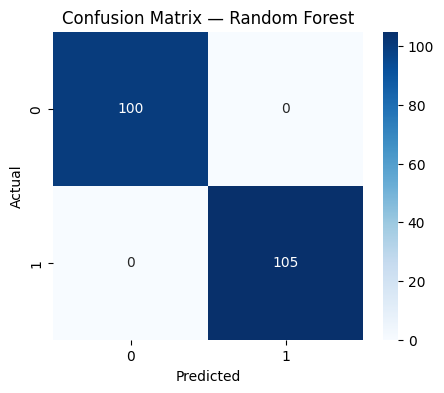

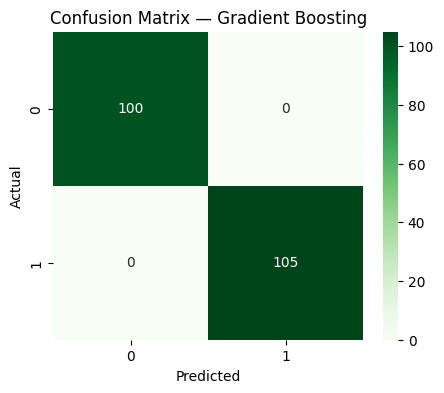

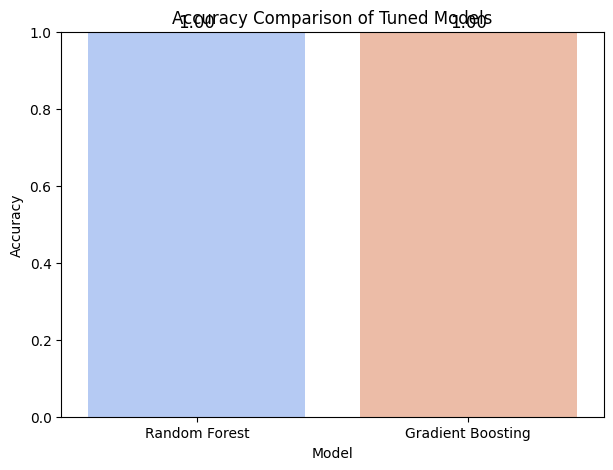

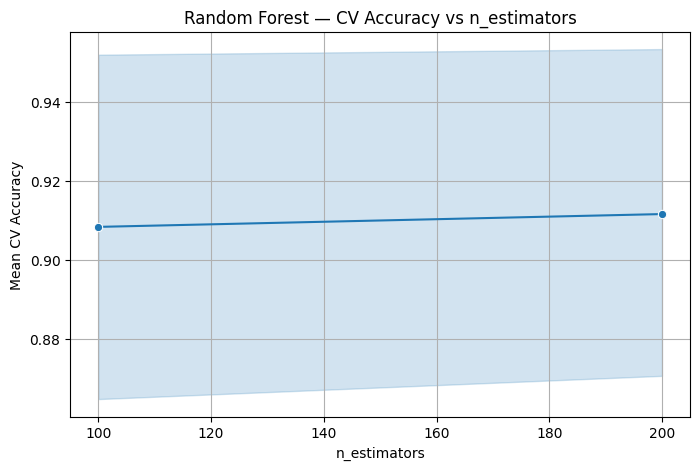

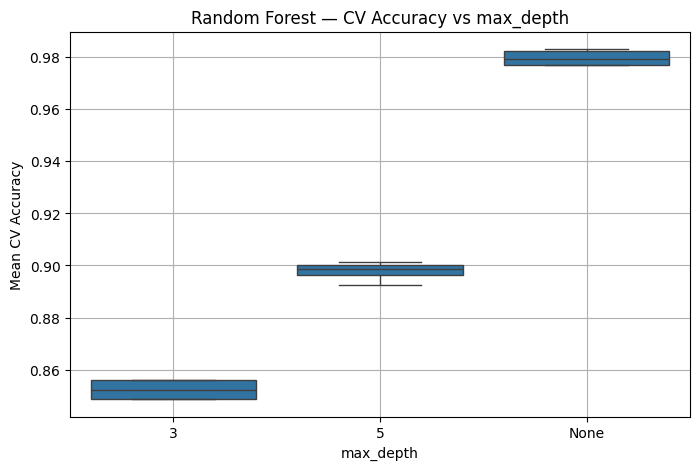

In [5]:
# Section 2 : Hyper Parameter Tuning
# -----------------------------
print("\n3.3 Model Selection and Hyperparameter Optimization")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Define models
rf = RandomForestClassifier(random_state=RANDOM_STATE)
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

# Define parameter grids (concise but meaningful)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# GridSearchCV setup
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
gb_grid = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

print("[INFO] Running grid search for Random Forest and Gradient Boosting...")
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

print(f"[RF] Best Params: {rf_grid.best_params_} | CV Acc: {rf_grid.best_score_:.4f}")
print(f"[GB] Best Params: {gb_grid.best_params_} | CV Acc: {gb_grid.best_score_:.4f}")

# -----------------------------
# Evaluation
# -----------------------------
print("\n3.4 Performance Evaluation Protocol")

# Predictions
rf_pred = best_rf.predict(X_test)
gb_pred = best_gb.predict(X_test)

# Optional: probabilities for AUC if labels are binary
rf_prob = best_rf.predict_proba(X_test)[:, 1] if hasattr(best_rf, "predict_proba") else None
gb_prob = best_gb.predict_proba(X_test)[:, 1] if hasattr(best_gb, "predict_proba") else None

# Metrics
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"\n[RESULT] Random Forest Test Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, rf_pred))
print(f"\n[RESULT] Gradient Boosting Test Accuracy: {gb_acc:.4f}")
print(classification_report(y_test, gb_pred))

if rf_prob is not None and gb_prob is not None and y_test.nunique() == 2:
    rf_auc = roc_auc_score(y_test, rf_prob)
    gb_auc = roc_auc_score(y_test, gb_prob)
    print(f"[AUC] RF: {rf_auc:.4f} | GB: {gb_auc:.4f}")

# Confusion matrices
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Random Forest"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix — Gradient Boosting"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# Accuracy comparison bar plot
acc_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': [rf_acc, gb_acc]
})

plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='coolwarm')
plt.ylim(0, 1); plt.ylabel("Accuracy"); plt.title("Accuracy Comparison of Tuned Models")
for i, row in acc_df.iterrows():
    plt.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center', fontsize=12)
plt.show()

# Visualize RF grid results (optional, research-style exploration)
rf_results = pd.DataFrame(rf_grid.cv_results_)
plt.figure(figsize=(8,5))
sns.lineplot(data=rf_results, x='param_n_estimators', y='mean_test_score', marker='o')
plt.title("Random Forest — CV Accuracy vs n_estimators")
plt.xlabel("n_estimators"); plt.ylabel("Mean CV Accuracy"); plt.grid(True); plt.show()

rf_results['param_max_depth'] = rf_results['param_max_depth'].astype(str)
plt.figure(figsize=(8,5))
sns.boxplot(x='param_max_depth', y='mean_test_score', data=rf_results)
plt.title("Random Forest — CV Accuracy vs max_depth")
plt.xlabel("max_depth"); plt.ylabel("Mean CV Accuracy"); plt.grid(True); plt.show()

